In [ ]:
!pip install -q kaggle


In [ ]:
from google.colab import files
import os

# Upload kaggle.json
uploaded = files.upload()

# Move kaggle.json to appropriate directory
if not os.path.exists('/root/.kaggle'):
    os.makedirs('/root/.kaggle')

for fn in uploaded.keys():
    os.rename(fn, '/root/.kaggle/kaggle.json')

# Change permissions of kaggle.json
os.chmod('/root/.kaggle/kaggle.json', 600)

# Install Kaggle API
!pip install -q kaggle

# Download dataset
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

# Unzip dataset
!unzip -q face-mask-12k-images-dataset.zip -d face-mask-12k-images-dataset


Saving kaggle.json to kaggle.json
A
 98% 323M/330M [00:03<00:00, 37.4MB/s]
100% 330M/330M [00:03<00:00, 88.0MB/s]


In [ ]:
pip install torch torchvision


In [ ]:
!pip install torchsummary

In [ ]:
pip install opencv-python


In [ ]:
import numpy as np
from sklearn import datasets
from torchvision.datasets import CIFAR100
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR100
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from torch.nn import Sequential
from sklearn.metrics import confusion_matrix
import numpy as np
from collections import defaultdict
import copy
import numpy as np
import pandas as pd
from tqdm import tqdm
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import torch.optim as optim
from torch.optim.lr_scheduler import MultiStepLR
from torchvision import datasets, transforms
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import MultiStepLR
from torchvision.datasets import CIFAR100
from torchvision.transforms import ToTensor, Normalize
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

import pandas as pd
import numpy as np
import os
import random
import shutil
from PIL import Image
import matplotlib.image as mpimg
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor, Normalize
from torchsummary import summary
import os
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2



In [ ]:
torch.manual_seed(42)


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [ ]:
train="/content/face-mask-12k-images-dataset/Face Mask Dataset/Train"
val="/content/face-mask-12k-images-dataset/Face Mask Dataset/Validation"
test="/content/face-mask-12k-images-dataset/Face Mask Dataset/Test"

In [ ]:
mean = [0.5, 0.5, 0.5]
std = [0.5, 0.5, 0.5]


transform_train = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.CenterCrop(64),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])


transform_val = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])


train_ds = ImageFolder(root=train, transform=transform_train)
val_ds = ImageFolder(root=val, transform=transform_val)
test_ds = ImageFolder(root=test, transform=transform_val)
size=len(train_ds)+len(val_ds)+len(test_ds)
print(size)

11792


In [ ]:
train_dl = DataLoader(train_ds, batch_size=128, shuffle=True, num_workers=3, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size=128, num_workers=3, pin_memory=True)
test_dl = DataLoader(val_ds, batch_size=128, num_workers=3, pin_memory=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


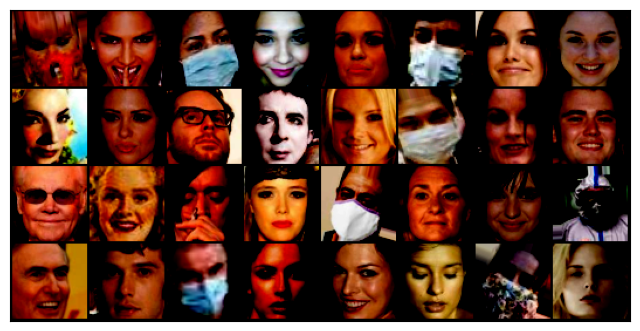

In [ ]:
from torchvision.utils import make_grid
def show_batch(train_dl):
    for images, labels in train_dl:
        fig, ax = plt.subplots(figsize=(8,8))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images[:32], nrow=8).permute(1,2,0))
        break

show_batch(train_dl)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Encoder(nn.Module):
    def __init__(self, latent_dim):
        super(Encoder, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=5, stride=2, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=2, stride=2, padding=1)
        self.fc_mu = nn.Linear(256*4*4, latent_dim)
        self.fc_logvar = nn.Linear(256*4*4, latent_dim)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = x.view(-1, 256*4*4)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

class Decoder(nn.Module):
    def __init__(self, latent_dim):
        super(Decoder, self).__init__()
        self.fc = nn.Linear(latent_dim, 256*4*4)
        self.convT1 = nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1)
        self.convT2 = nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1)
        self.convT3 = nn.ConvTranspose2d(64, 32, kernel_size=5, stride=2, padding=1)
        self.convT4 = nn.ConvTranspose2d(32, 3, kernel_size=6, stride=2, padding=1)

    def forward(self, z):
        x = self.fc(z)
        x = x.view(-1, 256, 4, 4)
        x = F.relu(self.convT1(x))
        x = F.relu(self.convT2(x))
        x = F.relu(self.convT3(x))
        x = torch.sigmoid(self.convT4(x))
        return x


class VAE(nn.Module):
    def __init__(self, latent_dim):
        super(VAE, self).__init__()
        self.encoder = Encoder(latent_dim)
        self.decoder = Decoder(latent_dim)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def forward(self, x):
        mu, logvar = self.encoder(x)
        z = self.reparameterize(mu, logvar)
        x_recon = self.decoder(z)
        return x_recon, mu, logvar


latent_dim=64
vae= VAE(latent_dim)
optimizer = torch.optim.Adam(vae.parameters(), lr=0.001)
criterion = nn.BCELoss(reduction='sum')

In [ ]:
import torch.nn.functional as F

def loss_function(x_recon, x, mu, log_var):

    recon_loss = F.mse_loss(x_recon, x, reduction='sum')

    # KL divergence
    kl_divergence = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())

    return recon_loss + kl_divergence


In [ ]:
kl_weight_start = 0.1
kl_weight_end = 1.0
kl_annealing_steps = 5

In [ ]:
def anneal(epoch, max_epoch):
    return min(1.0, epoch / (max_epoch / 2))


In [ ]:
train_losses = []
val_losses = []
epochs = 10
beta_initial=0.1


for epoch in range(epochs):
    vae.train()
    beta = anneal(epoch, epochs) * beta_initial

    train_loss = 0.0
    for batch_idx, (data, _) in enumerate(train_dl):
        data = data.to(device) # Move data to the appropriate device
        recon_batch, mu, logvar = vae(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        optimizer.zero_grad()  # Clear gradients before backward pass
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_dl.dataset)

    train_losses.append(train_loss)

    # Validation loop
    vae.eval()
    val_loss = 0.0
    with torch.no_grad():
        for data, _ in val_dl:
            data = data.to(device)
            recon_batch, mu, logvar = vae(data)
            val_loss += loss_function(recon_batch, data, mu, logvar).item()
    val_loss /= len(val_dl.dataset

    val_losses.append(val_loss)

    # Print the losses for each epoch
    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch 1/10, Train Loss: 2341.2877, Val Loss: 2326.1837
Epoch 2/10, Train Loss: 2331.3237, Val Loss: 2317.9264
Epoch 3/10, Train Loss: 2322.8730, Val Loss: 2315.7245
Epoch 4/10, Train Loss: 2316.2173, Val Loss: 2314.3635
Epoch 5/10, Train Loss: 2313.9354, Val Loss: 2309.3005
Epoch 6/10, Train Loss: 2306.0680, Val Loss: 2298.2566
Epoch 7/10, Train Loss: 2300.3625, Val Loss: 2291.3342
Epoch 8/10, Train Loss: 2296.3061, Val Loss: 2290.5988
Epoch 9/10, Train Loss: 2292.8903, Val Loss: 2305.1577
Epoch 10/10, Train Loss: 2291.1088, Val Loss: 2284.2690


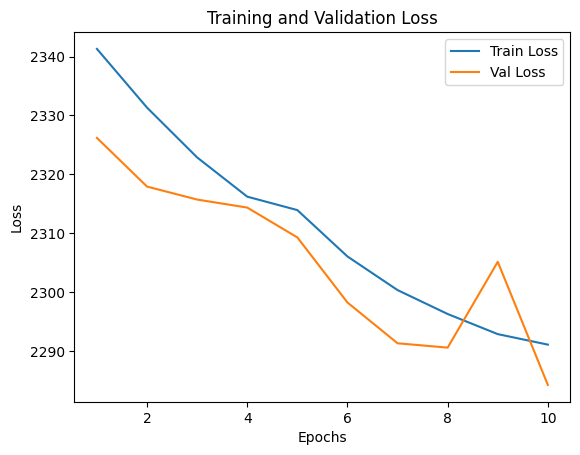

In [ ]:
plt.plot(range(1, 10+1), train_losses, label='Train Loss')
plt.plot(range(1, 10+1), val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

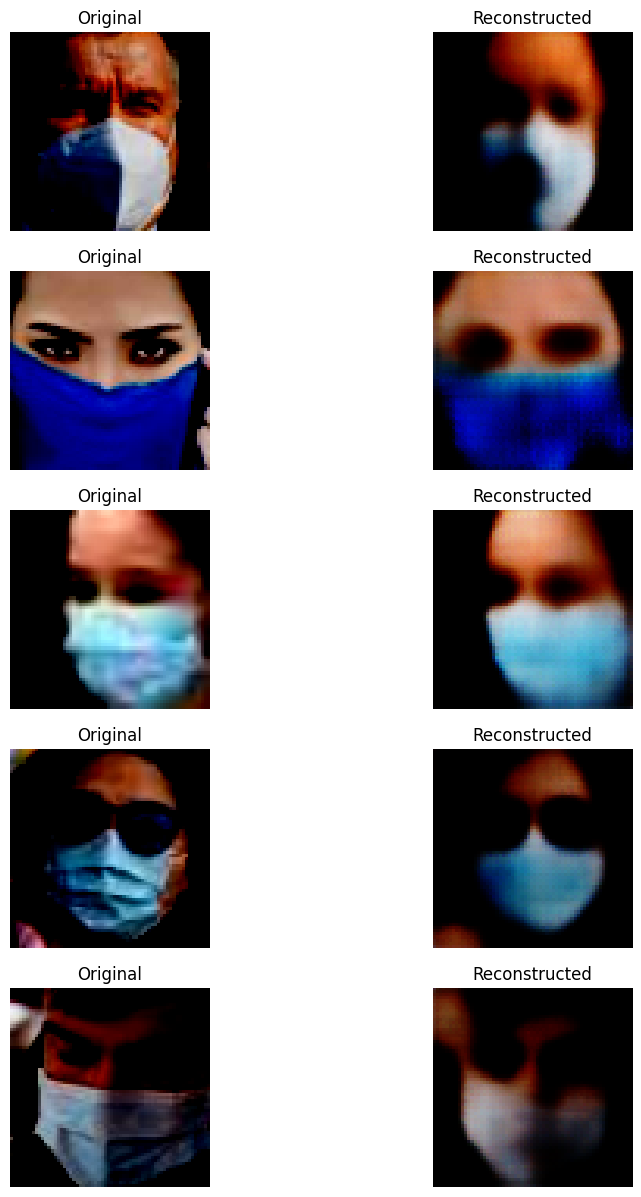

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
image_size = 32

scaler = StandardScaler()

# Set the model to evaluation mode
vae.eval()

# Get a batch of data from the validation loader
data, _ = next(iter(test_dl))
data=data.to(device)
recon_batch, _, _ = vae(data)

# Convert the data and recon_batch to numpy arrays
data_np = data.cpu().detach().numpy()
recon_batch_np = recon_batch.cpu().detach().numpy()

# Plot original and reconstructed images
num_images = 5
fig, axes = plt.subplots(num_images, 2, figsize=(10, 15))
for i in range(num_images):
    # Original images
    axes[i, 0].imshow(np.transpose(data_np[i], (1, 2, 0)))
    axes[i, 0].set_title('Original')
    axes[i, 0].axis('off')
    # Reconstructed images
    axes[i, 1].imshow(np.transpose(recon_batch_np[i], (1, 2, 0)))
    axes[i, 1].set_title('Reconstructed')
    axes[i, 1].axis('off')
plt.show()


In [ ]:
plt.plot(range(1, 10+1), train_losses, label='Train Loss')
plt.plot(range(1, 10+1), val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self,inp_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(inp_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU())
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128,inp_dim),
            nn.Sigmoid())

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.encoder(x)
        x = self.decoder(x)
        x = x.view(x.size(0), 3, 64,64)
        return x
model = Autoencoder(64*64*3)


In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs=20
batch_size=128
total_step=num_epochs*batch_size
for epoch in range(num_epochs):
    for i, data in enumerate(train_dl):
        inputs, _ = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
              .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/20], Step [1/2560], Loss: 0.6159
Epoch [1/20], Step [2/2560], Loss: 0.5569
Epoch [1/20], Step [3/2560], Loss: 0.6093
Epoch [1/20], Step [4/2560], Loss: 0.5277
Epoch [1/20], Step [5/2560], Loss: 0.5059
Epoch [1/20], Step [6/2560], Loss: 0.4879
Epoch [1/20], Step [7/2560], Loss: 0.4796
Epoch [1/20], Step [8/2560], Loss: 0.4467
Epoch [1/20], Step [9/2560], Loss: 0.3793
Epoch [1/20], Step [10/2560], Loss: 0.3879
Epoch [1/20], Step [11/2560], Loss: 0.3562
Epoch [1/20], Step [12/2560], Loss: 0.3114
Epoch [1/20], Step [13/2560], Loss: 0.3229
Epoch [1/20], Step [14/2560], Loss: 0.3019
Epoch [1/20], Step [15/2560], Loss: 0.2702
Epoch [1/20], Step [16/2560], Loss: 0.2875
Epoch [1/20], Step [17/2560], Loss: 0.2713
Epoch [1/20], Step [18/2560], Loss: 0.2582
Epoch [1/20], Step [19/2560], Loss: 0.2770
Epoch [1/20], Step [20/2560], Loss: 0.2650
Epoch [1/20], Step [21/2560], Loss: 0.2566
Epoch [1/20], Step [22/2560], Loss: 0.2600
Epoch [1/20], Step [23/2560], Loss: 0.2806
Epoch [1/20], Step [

In [ ]:
num_epochs=20

total_step=num_epochs*batch_size
for epoch in range(num_epochs):
    for i, data in enumerate(val_dl):
        inputs, _ = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
              .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/20], Step [1/2560], Loss: 0.2290
Epoch [1/20], Step [2/2560], Loss: 0.2087
Epoch [1/20], Step [3/2560], Loss: 0.2242
Epoch [1/20], Step [4/2560], Loss: 0.1664
Epoch [1/20], Step [5/2560], Loss: 0.1761
Epoch [1/20], Step [6/2560], Loss: 0.1746
Epoch [1/20], Step [7/2560], Loss: 0.1746
Epoch [2/20], Step [1/2560], Loss: 0.2291
Epoch [2/20], Step [2/2560], Loss: 0.2077
Epoch [2/20], Step [3/2560], Loss: 0.2238
Epoch [2/20], Step [4/2560], Loss: 0.1667
Epoch [2/20], Step [5/2560], Loss: 0.1760
Epoch [2/20], Step [6/2560], Loss: 0.1749
Epoch [2/20], Step [7/2560], Loss: 0.1735
Epoch [3/20], Step [1/2560], Loss: 0.2299
Epoch [3/20], Step [2/2560], Loss: 0.2086
Epoch [3/20], Step [3/2560], Loss: 0.2244
Epoch [3/20], Step [4/2560], Loss: 0.1684
Epoch [3/20], Step [5/2560], Loss: 0.1777
Epoch [3/20], Step [6/2560], Loss: 0.1751
Epoch [3/20], Step [7/2560], Loss: 0.1749
Epoch [4/20], Step [1/2560], Loss: 0.2352
Epoch [4/20], Step [2/2560], Loss: 0.2083
Epoch [4/20], Step [3/2560], Loss:

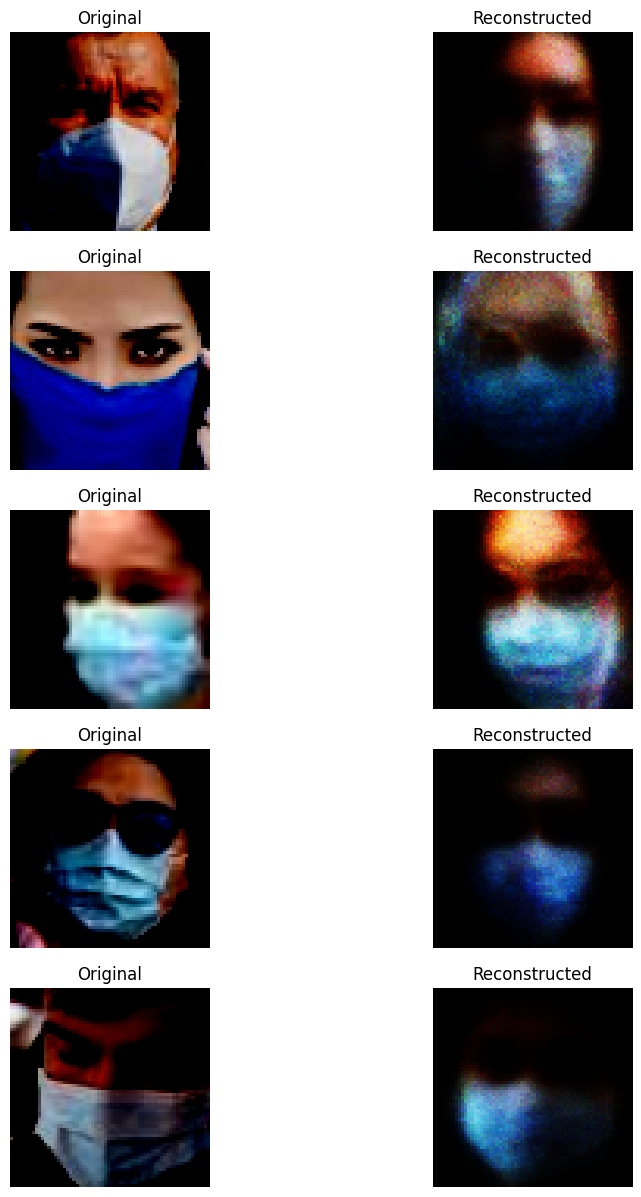

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming you have already defined and trained your VAE model (vae) and DataLoader (test_dl)
# Define the scaler object
scaler = StandardScaler()

# Set the model to evaluation mode
model.eval()

# Get a batch of data from the validation loader
data, _ = next(iter(val_dl))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# data = data.to(device)

# Forward pass
recon_batch = model(data)

# Convert the data and recon_batch to numpy arrays
data_np = data.cpu().detach().numpy()
recon_batch_np = recon_batch.cpu().detach().numpy()

# Plot original and reconstructed images
num_images = 5
fig, axes = plt.subplots(num_images, 2, figsize=(10, 15))
for i in range(num_images):
    # Original images
    axes[i, 0].imshow(np.transpose(data_np[i], (1, 2, 0)))
    axes[i, 0].set_title('Original')
    axes[i, 0].axis('off')
    # Reconstructed images
    axes[i, 1].imshow(np.transpose(recon_batch_np[i], (1, 2, 0)))
    axes[i, 1].set_title('Reconstructed')
    axes[i, 1].axis('off')
plt.show()


In [ ]:
def encode_vae(model, data_loader):
    encoded_data = []
    with torch.no_grad():
        for images, _ in test_dl:
            images = images.to(device)
            _, mu, _ = model(images)
            encoded_data.append(mu.cpu().detach().numpy())
    return np.concatenate(encoded_data)

# Encode data using autoencoder
def encode_autoencoder(model, data_loader):
    encoded_data = []
    with torch.no_grad():
        for images, _ in test_dl:
            images = images.to(device)
            encoded = model.encoder(images)
            encoded_data.append(encoded.cpu().detach().numpy())
    return np.concatenate(encoded_data)


In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Lists to store true labels and features for T-SNE
true_labels = []
features = []

with torch.no_grad():
    for data in test_dl:
        inputs, labels = data
        inputs = inputs

        # Forward pass through the model
        outputs = model(inputs)

        # Flatten the outputs if needed
        outputs = outputs.view(outputs.size(0), -1)

        features.extend(outputs.cpu().numpy())

# Convert lists to numpy arrays
true_labels = np.array(true_labels)
features = np.array(features)

# Apply t-SNE to reduce dimensionality to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features)


# Plot t-SNE embeddings
plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=true_labels, palette='viridis', legend='full')
plt.title('T-SNE Visualization')
plt.show()


In [ ]:
latent_vae_train = vae.encoder(train_ds)
latent_vae_test = vae.encoder(test_ds)
classifier = nn.Sequential(
    nn.Linear(latent_dim, 128),
    nn.ReLU(),
    nn.Linear(128, 2)
)
from sklearn.metrics import accuracy_score

num_epochs = 10
for epoch in range(num_epochs):
    optimizer.zero_grad()
    output = classifier(latent_vae_train)
    loss = criterion(output,train_ds[1] )
    loss.backward()
    optimizer.step()

# Evaluate classifier performance on test set
with torch.no_grad():
    output_test = classifier(latent_vae_test)
    predictions = torch.argmax(output_test, dim=1)
    accuracy = accuracy_score(y_test.numpy(), predictions.numpy())
    print(f'Accuracy of VAE Latent Representation Classifier: {accuracy}')

# To get high fidelity in VAE

1. Scale Autoregressive Priors:  Scale and enhance autoregressive priors like VQ-VAE to generate higher-quality and more coherent synthetic samples.
2. Utilize Vector Quantized VAE (VQ-VAE):     Implement a multi-scale hierarchical VQ-VAE with powerful priors over latent codes, rivaling state-of-the-art GANs on datasets like ImageNet.
3. Explore Hierarchical Organization:  Implement a multi-scale hierarchical VQ-VAE to enhance sample quality and diversity.
 Use powerful priors over latent codes to improve high-fidelity image generation across datasets.
